In [2]:
from cpymad.madx import Madx
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('~/Documents/code/stylelib/madx.mplstyle')

In [3]:
# initiate madx
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2024.07.10 14:43:37      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [4]:
# parameters
amu_mev = 931.49410242 # MeV
beam_energy = 200.0 # MeV/u
circumference = 60.35075196 # from madx, not geometrical
n_turns = 1 # full turns of the ring

In [5]:
# input n_turns for sequence file
madx.input(f'n_turns = {n_turns};')
# call sequence
madx.call(file='r3_center.seq')

! r3 ring sequence with refer = center for use of makethin command etc.

! G.Hudson-Chang June 2024



! ===== parameters =====

full_gap = 0.08; ! Full width pole to pole gap [m]

b_angle = 15*raddeg; ! Bending angle [rad.]

b_rad_tarnd = 4.045; ! Bending radius of TARNII-D [m]



! ===== lengths =====

l_dp = b_rad_tarnd*b_angle; ! length of dipole

l_dp_drft = 0.6; ! drift section between R3 dipoles



l_str = 4.022544566; ! straight section

l_str_hf = 2.011272283; ! half straight section



l_r3_bend = 4*l_dp+3*l_dp_drft; ! length of r3_bend section

l_r3_bend_hf = l_r3_bend/2; ! length of r3_bend section

l_ring = 6*l_r3_bend+6*l_str;



! ===== dipole magnets =====

! ring dipole with trim coil

dp_trim: sbend, 

        l = l_dp,

        angle = b_angle,

        hgap = full_gap/2,

        ! tilt = 0.0*raddeg,

        e1 = 7.5*pi/180,

        e2 = 7.5*pi/180,

        fint = 0.654, ! fint is same as old tarnii-file

        ktap = dp_modifier,

        k1 = 0.0739951, ! til

In [6]:
# initiate beam with initial conditions
madx.command.beam(
    mass = 124*amu_mev/1000, # input is GeV
    charge = 54.0,
    energy = 124*(amu_mev+beam_energy)/1000, # also GeV
    sigt = 4.4616, # bunch length
    sige = 0.001, # rel energy spread
    kbunch = 18, # n bunches in machine
    radiate = True, # synchrotron radiation
    bunched = True,
)

True

In [7]:
# use the beam in the sequence
madx.use(sequence = 'full_ring')

In [8]:
# creating geometric survey of the ring
survey = madx.survey(sequence = 'full_ring', file = 'r3_survey.out')

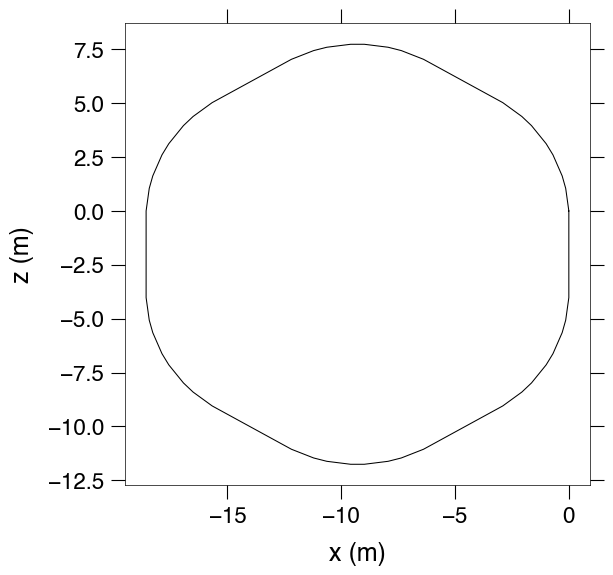

In [44]:
# survey plot
# importing survey data to check shape of ring
survey = np.transpose(np.genfromtxt('r3_survey.out', skip_header=8))

# plotting geometrical survey data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(survey[5], survey[7], color='black')

ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
plt.savefig(f'plots/r3_survey.pdf', bbox_inches='tight')

In [23]:
# matching copied from old ring file by Y. Yamaguchi
madx.command.match(sequence = 'full_ring')
madx.command.constraint(mux = 1.216)
madx.command.vary(NAME = 'dp_trim->k2', step = 0.001, lower = -1.0, upper = 1.0)
madx.command.simplex(calls = 100000, tolerance = 1.0e-12)

START MATCHING

number of sequences: 1
sequence name: full_ring
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
number of variables:    1
user given constraints: 1
total constraints:      366

START SIMPLEX:

++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed 

True

In [24]:
madx.command.endmatch()

++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
full_ring$start:1          mux          4     1.21600000E+00     0.00000000E+00     1.47865600E+02
r3_bend$start:1            mux          4     1.21600000E+00     0.00000000E+00     1.47865600E+02
bm1_den:1                  mux          4     1.21600000E+00     0.00000000E+00     1.47865600E+02
marker:1                   mux          4     1.21600000E+00     0.00000000E+00     1.47865600E+02
drift_0:0                  mux          4     1.21600000E+00     1.03061017E-02     1.45369778E+02
bm

True

In [25]:
madx.use(sequence='full_ring')

In [26]:
twiss = madx.twiss(deltap = '-0.005,0.0,0.005')

enter Twiss module
  
iteration:   1 error:   4.213325E-02 deltap:  -5.000000E-03
orbit:  -3.201447E-02 -1.333666E-16  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   3.469447E-17 deltap:  -5.000000E-03
orbit:  -3.201447E-02 -1.320305E-16  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.

++++++ table: summ

            length             orbit5               alfa            gammatr 
       60.35075196                 -0       0.6583044728        1.232499061 

                q1                dq1            betxmax              dxmax 
       1.256353606       -1.211343551        8.441658422        11.51089601 

             dxrms             xcomax             xcorms                 q2 
       11.08045321       0.0325661824      0.03135440187       0.8894781633 

               dq2            betymax

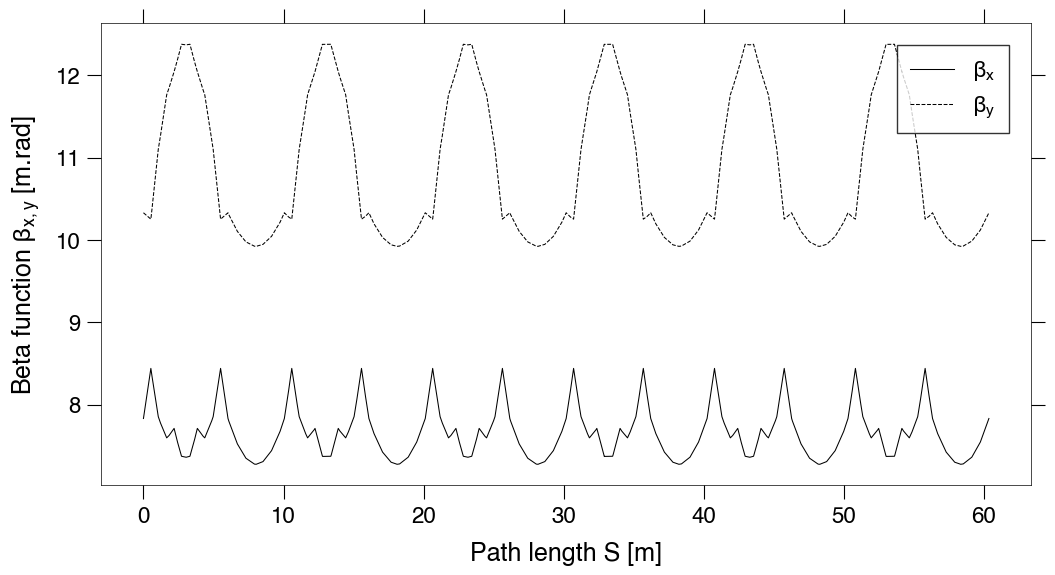

In [36]:
# low res. initial beta function plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(twiss['s'], twiss['betx'], label=r'$\beta_x$', color='black')
ax.plot(twiss['s'], twiss['bety'], label=r'$\beta_y$', color='black', linestyle='--')

ax.set_xlabel('Path length S [m]')
ax.set_ylabel(r'Beta function $\beta_{x,y}$ [m.rad]')

ax.legend();

plt.savefig('plots/r3_twiss.pdf', bbox_inches='tight')

In [37]:
# flattening ring matrix to avoid errors in makethin
madx.command.seqedit(sequence='full_ring')
madx.command.flatten()
madx.command.endedit()

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0


True

In [38]:
# must use ring before makethin command
madx.use(sequence = 'full_ring')

In [39]:
# thin lens approximation
# set parameters
assert madx.command.select(
    flag='makethin',
    class_='dipole',
    slice_=8,
    thick = True,
)
# use command
assert madx.command.makethin(
    sequence = 'full_ring'
)

makethin: slicing sequence : full_ring


In [40]:
# adding monitors for increased resolution
madx.command.seqedit(sequence='full_ring')
# 100 monitors evenly spaced over the ring
for s in np.linspace(start=0, stop=circumference, num=100):
    madx.command.install(element='Marker', at=s)
madx.command.flatten() # flatten just to be sure!
madx.command.endedit()

++++++ info: seqedit - number of elements installed:  100
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0


True

In [41]:
madx.use(sequence='full_ring')

In [42]:
twiss_new = madx.twiss(
    deltap='-0.005,0.0,0.005',
    chrom = True,
    file='data/twiss.out',
    sectormap=True,
    sectorfile='data/sectormap.out'
)

enter Twiss module
  
iteration:   1 error:   4.212454E-02 deltap:  -4.999000E-03
orbit:  -3.200811E-02 -1.404292E-16  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   2.081668E-17 deltap:  -4.999000E-03
orbit:  -3.200811E-02 -1.337607E-16  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.
  
iteration:   1 error:   4.213325E-02 deltap:  -5.000000E-03
orbit:  -3.201447E-02 -1.333666E-16  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   3.469447E-17 deltap:  -5.000000E-03
orbit:  -3.201447E-02 -1.320305E-16  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCPGO:  TWISS uses the RF system or synchrotron radiation only to find the closed orbit, for optical calculations it ignores both.

++++++ table: summ

            length             orbit5       

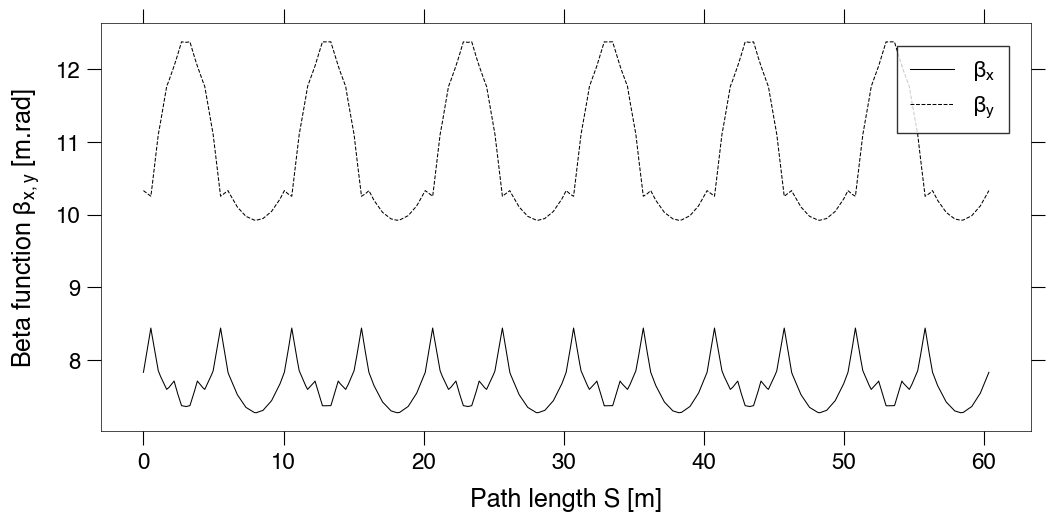

In [43]:
# beta function plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(twiss_new['s'], twiss_new['betx'], label=r'$\beta_x$', color='black')
ax.plot(twiss_new['s'], twiss_new['bety'], label=r'$\beta_y$', color='black', linestyle='--')
# ax.plot(twiss_new['s'], twiss_new['dx'], label=r'$\beta_y$', color='black', linestyle='-.')

ax.set_xlabel('Path length S [m]')
ax.set_ylabel(r'Beta function $\beta_{x,y}$ [m.rad]')

ax.legend()
plt.subplots_adjust(bottom=0.2)
plt.savefig('plots/r3_beta.pdf')